In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

In [2]:
df = pd.read_csv('C:\STUDIA MGR - semestr II\DV laboratory\owid-covid-data.csv')
europe_df = df[df['continent'] == 'Europe']

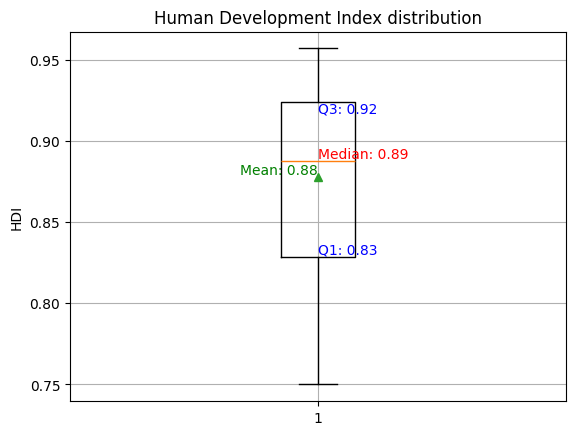

Null Hypothesis: There is no statistically significant difference between the median and mean values of the dataset.
Median: 0.8875
Mean: 0.8777000000000001
Wilcoxon Statistic: 394.0
P-value: 0.8367550107286661
Fail to reject the null hypothesis. Based on the p-value it cannot be conclude that there is significant difference between median and mean.

As we can observe on the above plot, values of median and mean are quite close to each other.
Also the Wilcoxon signed-rank test did not provided significant evidances to wether choose median or mean.
With that knowledge (and with the awareness that mean's value is sensitive for the outliers more than median's value)
it has been decided to use mean in the process of selecting the third country for analysis (by the HDI index) - the point is to take all European countries into account.

HDI: highest - Norway, GDP: 64800.057,
closest to mean - Poland, GDP: 27216.445,
lowest - Moldova, GDP: 5189.972
GDP: highest - Luxembourg, closest to mean -

In [13]:
# TO GET SOME OVERVIEW ON HDI AND GDP PER CAPITA INDICES:
# country "on the mean":
average_hdi = europe_df['human_development_index'].mean()
average_gdp = europe_df['gdp_per_capita'].mean()

# deciding whether to use the mean or median:

# HDI BOXPLOT:
all_hdi = europe_df.drop_duplicates(subset='human_development_index')
plt.figure()
plt.boxplot(all_hdi['human_development_index'].dropna(), showfliers=False, showmeans=True)
plt.grid()
plt.title('Human Development Index distribution')
plt.ylabel('HDI')

median = all_hdi['human_development_index'].dropna().median()
q1, q3 = all_hdi['human_development_index'].dropna().quantile([0.25, 0.75])
mean = all_hdi['human_development_index'].dropna().mean()
plt.text(1, median, f'Median: {median:.2f}', verticalalignment='bottom', horizontalalignment='left', color='red')
plt.text(1, q1, f'Q1: {q1:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue')
plt.text(1, q3, f'Q3: {q3:.2f}', verticalalignment='top', horizontalalignment='left', color='blue')
plt.text(1, mean, f'Mean: {mean:.2f}', verticalalignment='bottom', horizontalalignment='right', color='green')
plt.show()

# wilcoxon test to check if there is significant difference between the mean and median of HDI values.
print('Null Hypothesis: There is no statistically significant difference between the median and mean values of the dataset.')
statistic, p_value = wilcoxon(all_hdi['human_development_index'].dropna() - mean)
# Output results
print("Median:", median)
print("Mean:", mean)
print("Wilcoxon Statistic:", statistic)
print("P-value:", p_value)

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between median and mean.")
else:
    print("Fail to reject the null hypothesis. Based on the p-value it cannot be conclude that there is significant difference between median and mean.\n")

print("As we can observe on the above plot, values of median and mean are quite close to each other.")
print("Also the Wilcoxon signed-rank test did not provided significant evidances to wether choose median or mean.")
print("With that knowledge (and with the awareness that mean's value is sensitive for the outliers more than median's value)")
print("it has been decided to use mean in the process of selecting the third country for analysis (by the HDI index) - the point is to take all European countries into account.\n")


# HDI:
highest_hdi_country = europe_df.loc[europe_df['human_development_index'].idxmax()]['location']
highest_gdp_value = europe_df.loc[europe_df['human_development_index'].idxmax()]['gdp_per_capita']


lowest_hdi_country = europe_df.loc[europe_df['human_development_index'].idxmin()]['location']
lowest_gdp_value = europe_df.loc[europe_df['human_development_index'].idxmin()]['gdp_per_capita']

closest_hdi_country = europe_df.loc[
    (europe_df['human_development_index'] - average_hdi).abs().idxmin()
]['location']
closest_gdp_value = europe_df.loc[
    (europe_df['human_development_index'] - average_hdi).abs().idxmin()
]['gdp_per_capita']

# GDP:
highest_gdp_country = europe_df.loc[europe_df['gdp_per_capita'].idxmax()]['location']
lowest_gdp_country = europe_df.loc[europe_df['gdp_per_capita'].idxmin()]['location']
closest_gdp_country = europe_df.loc[
    (europe_df['gdp_per_capita'] - average_gdp).abs().idxmin()
]['location']



# results:
print(f'HDI: highest - {highest_hdi_country}, GDP: {highest_gdp_value},\nclosest to mean - {closest_hdi_country}, GDP: {closest_gdp_value},\nlowest - {lowest_hdi_country}, GDP: {lowest_gdp_value}')
print(f'GDP: highest - {highest_gdp_country}, closest to mean - {closest_gdp_country}, lowest - {lowest_gdp_country}')


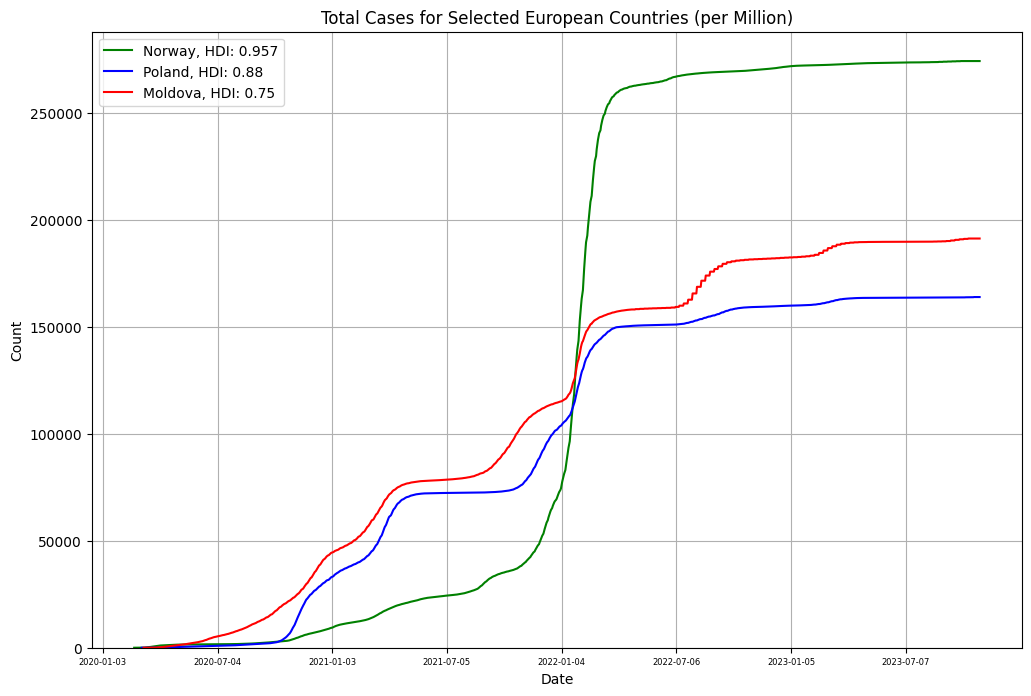

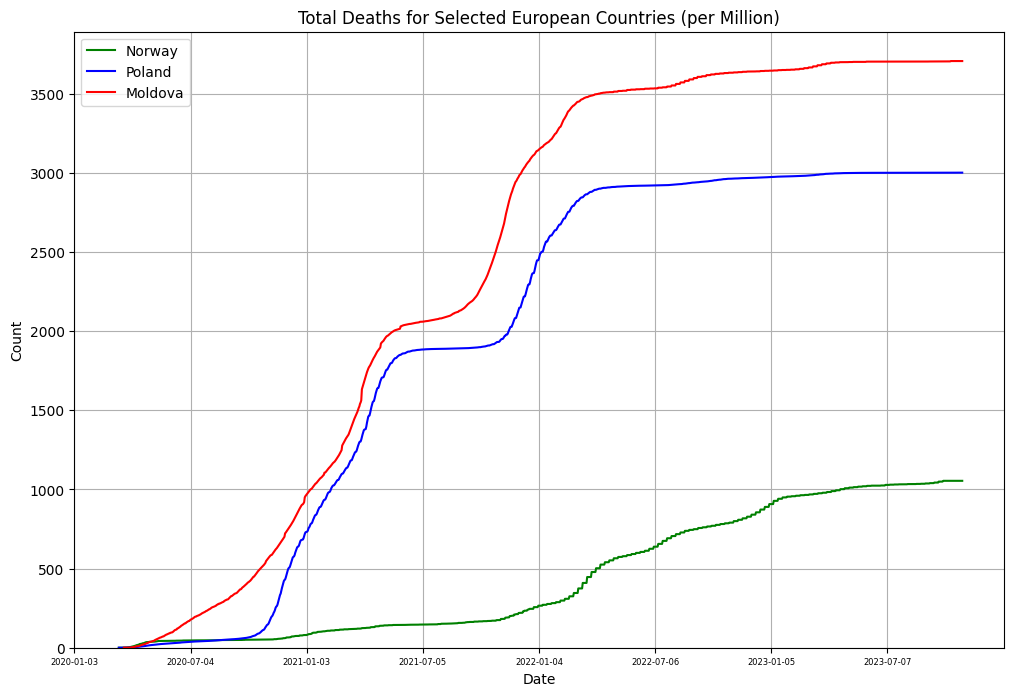

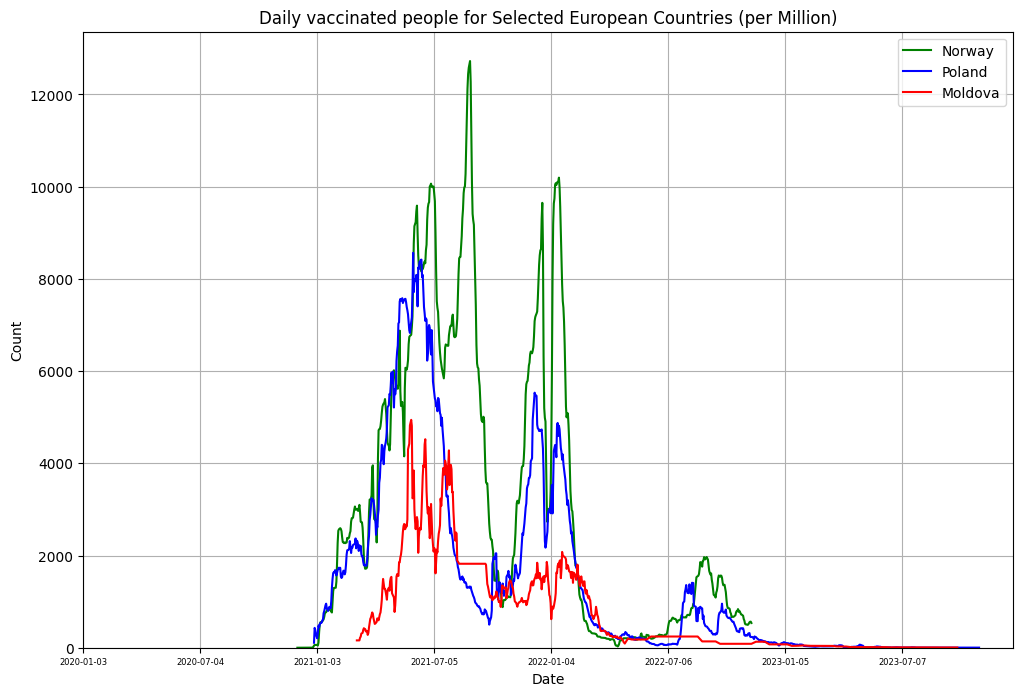

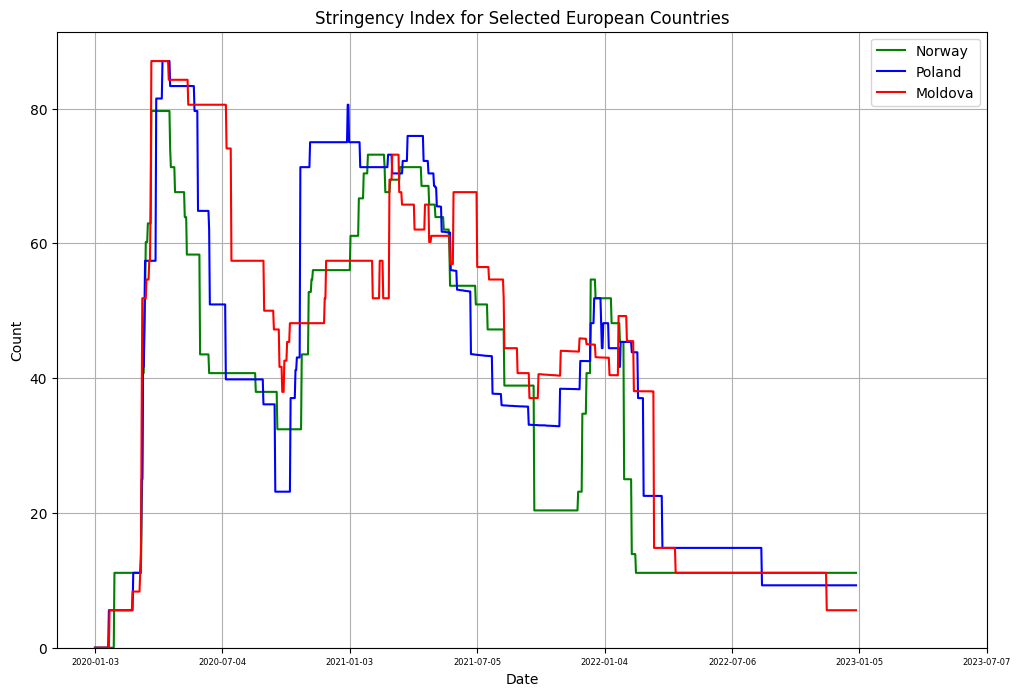

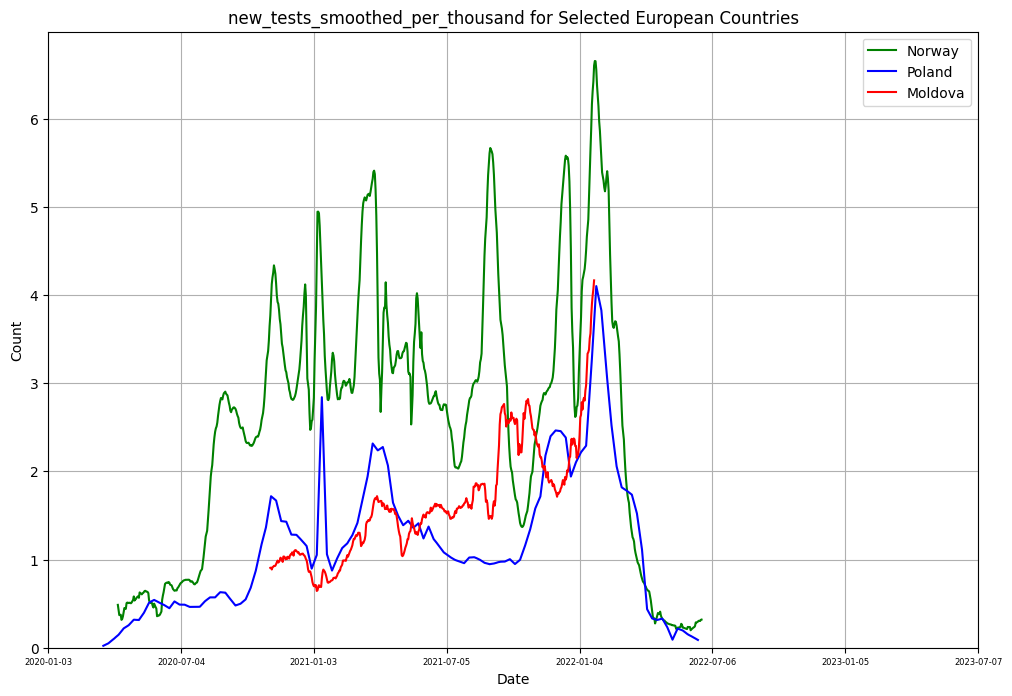

In [4]:
# deciding to rely on hdi measure for future country selection and analysis:
highest_hdi_df = df[df['location'] == highest_hdi_country]
lowest_hdi_df = df[df['location'] == lowest_hdi_country]
closest_hdi_df = df[df['location'] == closest_hdi_country]

[highest_hdi] = np.unique(highest_hdi_df['human_development_index'])
[closest_hdi] = np.unique(closest_hdi_df['human_development_index'])
[lowest_hdi] = np.unique(lowest_hdi_df['human_development_index'])

# providing overveiw of our considered data subsets for future analysis:
# Plot of total cases
plt.figure(figsize=(12, 8))

plt.plot(highest_hdi_df['date'], highest_hdi_df['total_cases_per_million'], label=f'{highest_hdi_country}, HDI: {highest_hdi}', color='green')
plt.plot(closest_hdi_df['date'], closest_hdi_df['total_cases_per_million'], label=f'{closest_hdi_country}, HDI: {closest_hdi}', color='blue')
plt.plot(lowest_hdi_df['date'], lowest_hdi_df['total_cases_per_million'], label=f'{lowest_hdi_country}, HDI: {lowest_hdi}', color='red')

plt.xticks(closest_hdi_df['date'][::183], fontsize=6)
plt.ylim(bottom=0)
plt.title('Total Cases for Selected European Countries (per Million)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

# Plot of total deaths
plt.figure(figsize=(12, 8))

plt.plot(highest_hdi_df['date'], highest_hdi_df['total_deaths_per_million'], label=f'{highest_hdi_country}', color='green')
plt.plot(closest_hdi_df['date'], closest_hdi_df['total_deaths_per_million'], label=f'{closest_hdi_country}', color='blue')
plt.plot(lowest_hdi_df['date'], lowest_hdi_df['total_deaths_per_million'], label=f'{lowest_hdi_country}', color='red')


plt.xticks(closest_hdi_df['date'][::183], fontsize=6)
plt.ylim(bottom=0)
plt.title('Total Deaths for Selected European Countries (per Million)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

#Plot of new vaccinations per million
plt.figure(figsize=(12, 8))

plt.plot(highest_hdi_df['date'], highest_hdi_df['new_vaccinations_smoothed_per_million'], label=f'{highest_hdi_country}', color='green')
plt.plot(closest_hdi_df['date'], closest_hdi_df['new_vaccinations_smoothed_per_million'], label=f'{closest_hdi_country}', color='blue')
plt.plot(lowest_hdi_df['date'], lowest_hdi_df['new_vaccinations_smoothed_per_million'], label=f'{lowest_hdi_country}', color='red')

plt.xticks(closest_hdi_df['date'][::183], fontsize=6)
plt.ylim(bottom=0)
plt.title('Daily vaccinated people for Selected European Countries (per Million)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()


#Plot of stringency_index
plt.figure(figsize=(12, 8))

plt.plot(highest_hdi_df['date'], highest_hdi_df['stringency_index'], label=f'{highest_hdi_country}', color='green')
plt.plot(closest_hdi_df['date'], closest_hdi_df['stringency_index'], label=f'{closest_hdi_country}', color='blue')
plt.plot(lowest_hdi_df['date'], lowest_hdi_df['stringency_index'], label=f'{lowest_hdi_country}', color='red')

plt.xticks(closest_hdi_df['date'][::183], fontsize=6)
plt.ylim(bottom=0)
plt.title('Stringency Index for Selected European Countries')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()


#Plot of total_tests
plt.figure(figsize=(12, 8))

plt.plot(highest_hdi_df['date'], highest_hdi_df['new_tests_smoothed_per_thousand'], label=f'{highest_hdi_country}', color='green')
plt.plot(closest_hdi_df['date'], closest_hdi_df['new_tests_smoothed_per_thousand'], label=f'{closest_hdi_country}', color='blue')
plt.plot(lowest_hdi_df['date'], lowest_hdi_df['new_tests_smoothed_per_thousand'], label=f'{lowest_hdi_country}', color='red')

plt.xticks(closest_hdi_df['date'][::183], fontsize=6)
plt.ylim(bottom=0)
plt.title('new_tests_smoothed_per_thousand for Selected European Countries')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()


It is important to emphasize what influences the 'Total Cases' distribution.
Since Norway is a country with the highest HDI, why we observe the gratest number of COVID-19 cases there?


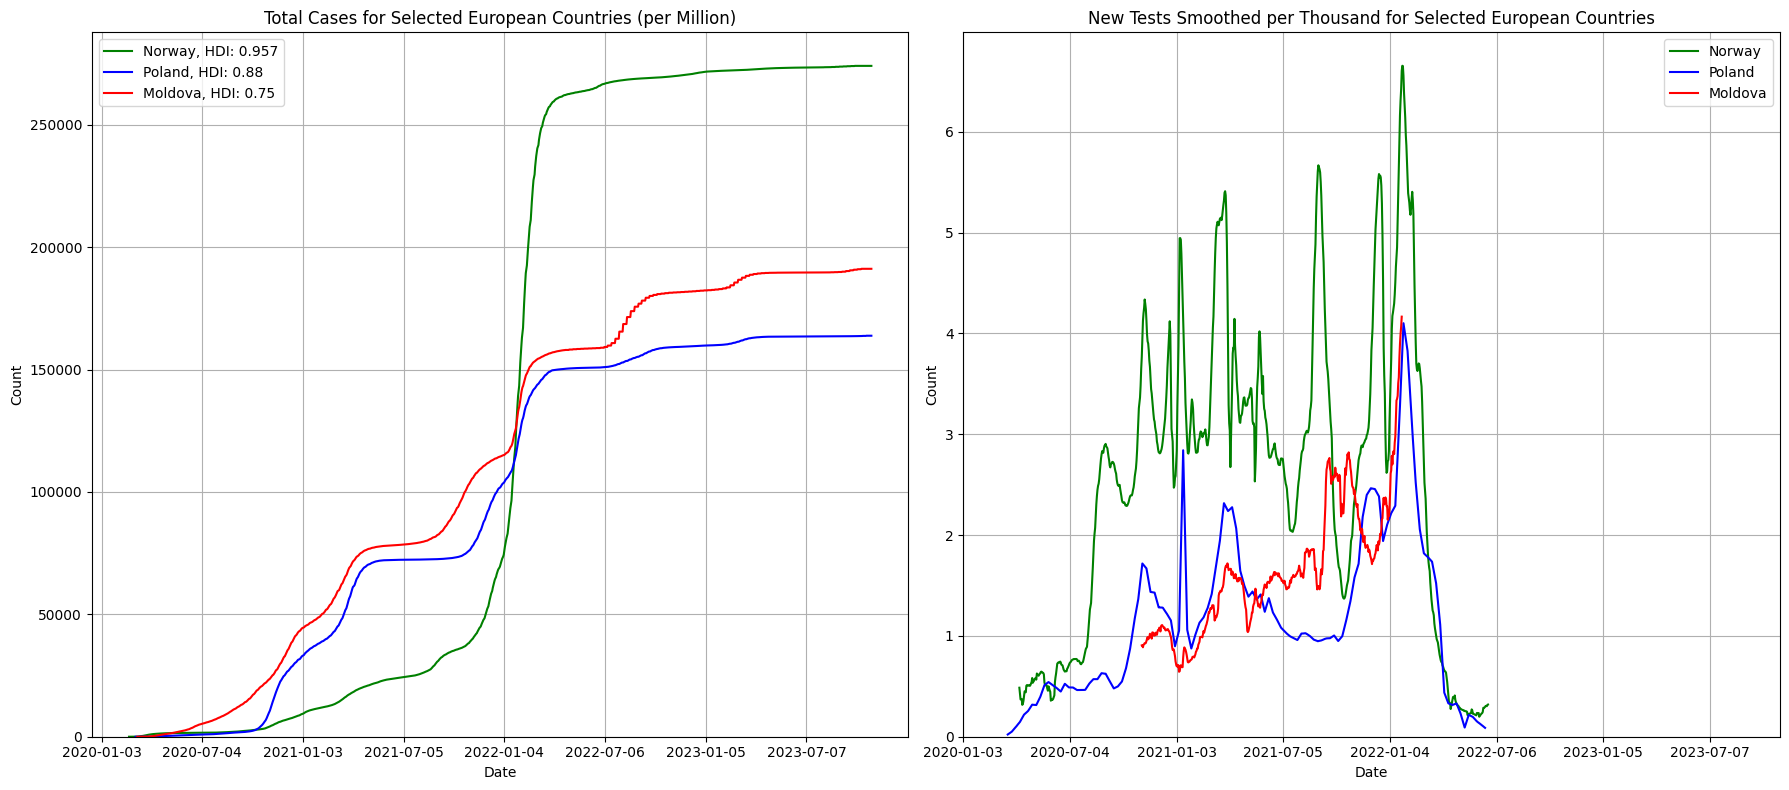

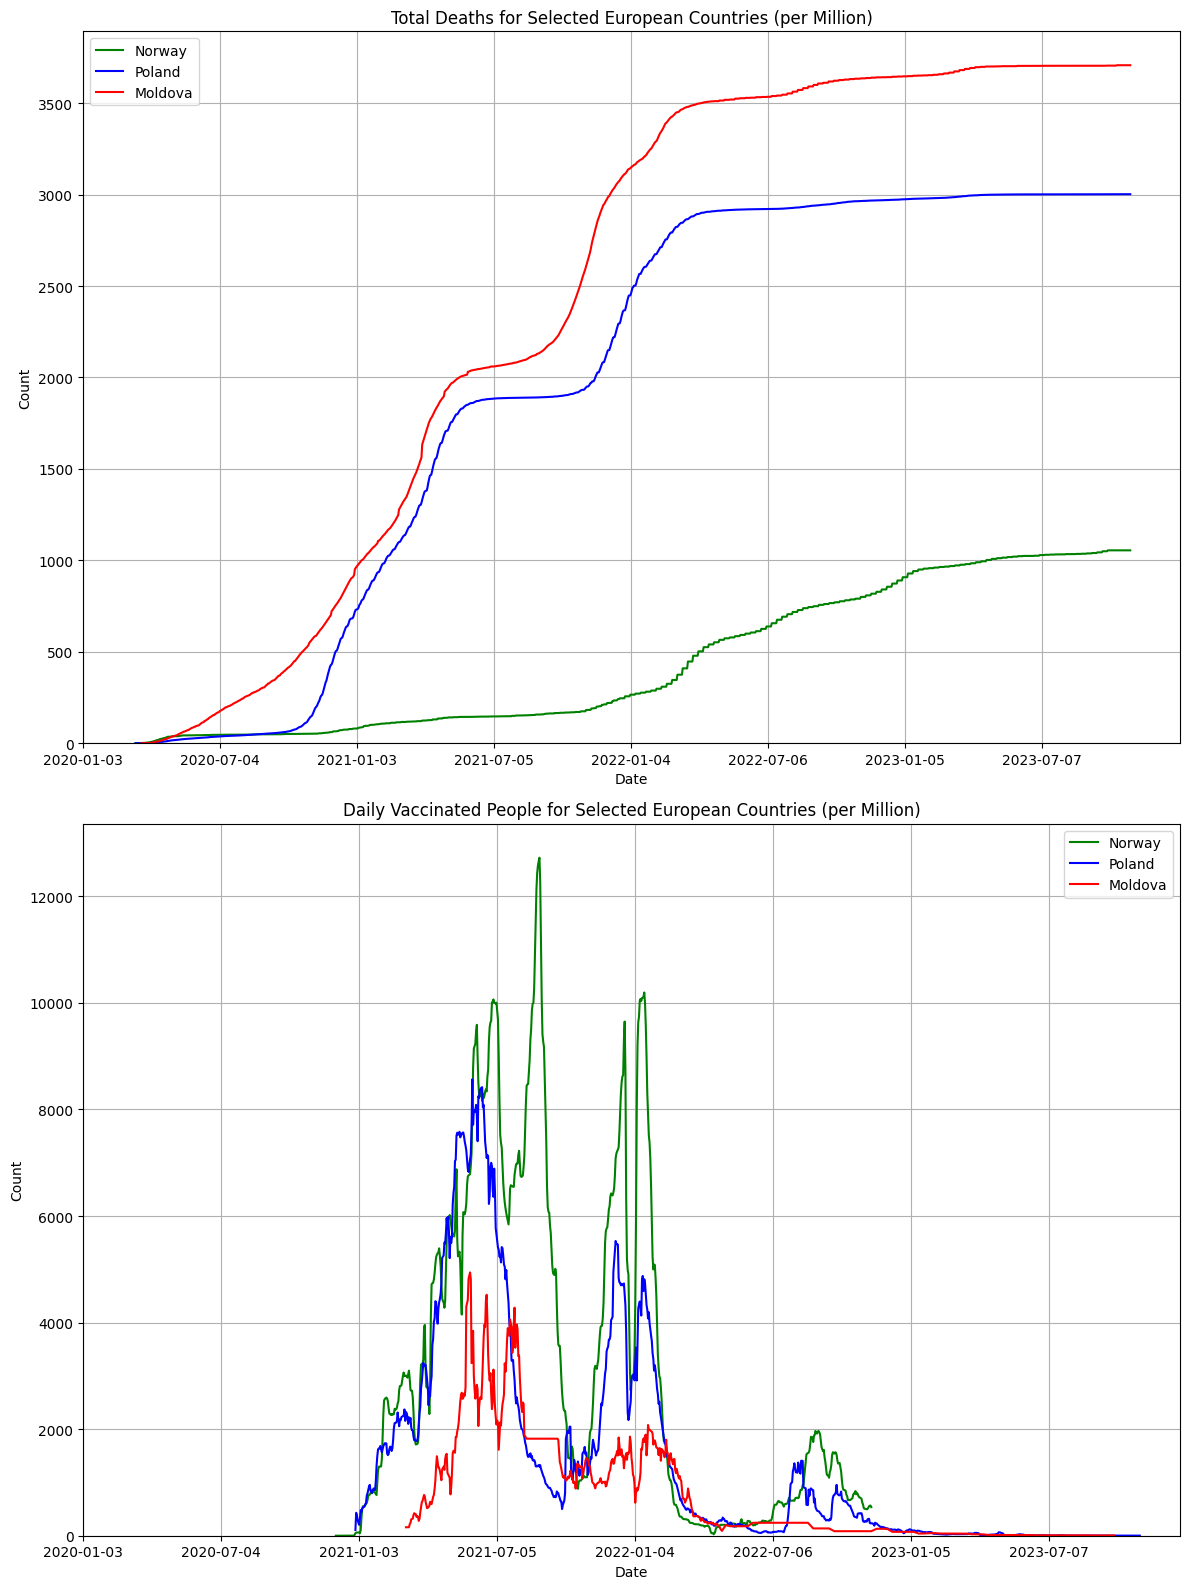

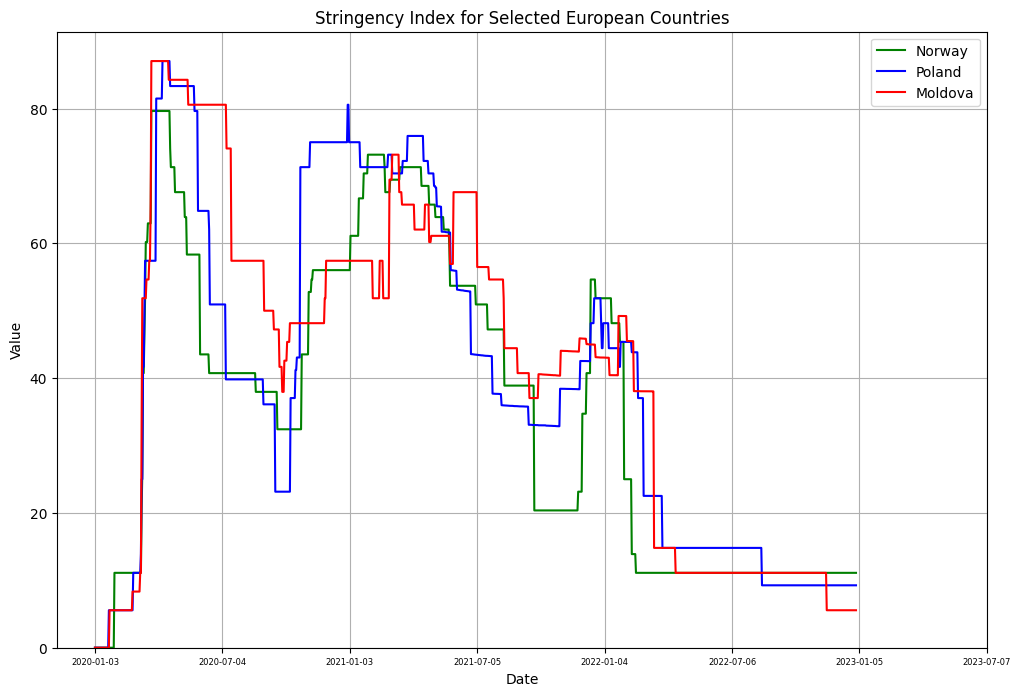

In [9]:
print("\nIt is important to emphasize what influences the 'Total Cases' distribution.\nSince Norway is a country with the highest HDI, why we observe the gratest number of COVID-19 cases there?")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Total Cases
ax1.plot(highest_hdi_df['date'], highest_hdi_df['total_cases_per_million'], label=f'{highest_hdi_country}, HDI: {highest_hdi}', color='green')
ax1.plot(closest_hdi_df['date'], closest_hdi_df['total_cases_per_million'], label=f'{closest_hdi_country}, HDI: {closest_hdi}', color='blue')
ax1.plot(lowest_hdi_df['date'], lowest_hdi_df['total_cases_per_million'], label=f'{lowest_hdi_country}, HDI: {lowest_hdi}', color='red')
ax1.set_xticks(closest_hdi_df['date'][::183])
ax1.set_ylim(bottom=0)
ax1.set_title('Total Cases for Selected European Countries (per Million)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid()

# Total Tests
ax2.plot(highest_hdi_df['date'], highest_hdi_df['new_tests_smoothed_per_thousand'], label=f'{highest_hdi_country}', color='green')
ax2.plot(closest_hdi_df['date'], closest_hdi_df['new_tests_smoothed_per_thousand'], label=f'{closest_hdi_country}', color='blue')
ax2.plot(lowest_hdi_df['date'], lowest_hdi_df['new_tests_smoothed_per_thousand'], label=f'{lowest_hdi_country}', color='red')
ax2.set_xticks(closest_hdi_df['date'][::183])
ax2.set_ylim(bottom=0)
ax2.set_xlim(closest_hdi_df.loc[closest_hdi_df['date'].idxmin()]['date'], closest_hdi_df.loc[closest_hdi_df['date'].idxmax()]['date'])
ax2.set_title('New Tests Smoothed per Thousand for Selected European Countries')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count')
ax2.legend()
ax2.grid()

# adjusting layout to prevent clipping of titles
plt.tight_layout()
plt.savefig('comparison_totalcases_tests.png')
plt.show()


#######################################################################################################################################

fig, axs = plt.subplots(2, 1, figsize=(12, 16))

# total deaths per million
axs[0].plot(highest_hdi_df['date'], highest_hdi_df['total_deaths_per_million'], label=f'{highest_hdi_country}', color='green')
axs[0].plot(closest_hdi_df['date'], closest_hdi_df['total_deaths_per_million'], label=f'{closest_hdi_country}', color='blue')
axs[0].plot(lowest_hdi_df['date'], lowest_hdi_df['total_deaths_per_million'], label=f'{lowest_hdi_country}', color='red')

axs[0].set_xticks(closest_hdi_df['date'][::183])
axs[0].set_ylim(bottom=0)
axs[0].set_title('Total Deaths for Selected European Countries (per Million)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Count')
axs[0].legend()
axs[0].grid()

# new vaccinations per million
axs[1].plot(highest_hdi_df['date'], highest_hdi_df['new_vaccinations_smoothed_per_million'], label=f'{highest_hdi_country}', color='green')
axs[1].plot(closest_hdi_df['date'], closest_hdi_df['new_vaccinations_smoothed_per_million'], label=f'{closest_hdi_country}', color='blue')
axs[1].plot(lowest_hdi_df['date'], lowest_hdi_df['new_vaccinations_smoothed_per_million'], label=f'{lowest_hdi_country}', color='red')

axs[1].set_xticks(closest_hdi_df['date'][::183])
axs[1].set_ylim(bottom=0)
axs[1].set_title('Daily Vaccinated People for Selected European Countries (per Million)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Count')
axs[1].legend()
axs[1].grid()

# adjusting layout to prevent clipping of titles
plt.tight_layout()
plt.savefig('comparison_totaldeaths_vacc.png')
plt.show()


#Plot of stringency_index
plt.figure(figsize=(12, 8))

plt.plot(highest_hdi_df['date'], highest_hdi_df['stringency_index'], label=f'{highest_hdi_country}', color='green')
plt.plot(closest_hdi_df['date'], closest_hdi_df['stringency_index'], label=f'{closest_hdi_country}', color='blue')
plt.plot(lowest_hdi_df['date'], lowest_hdi_df['stringency_index'], label=f'{lowest_hdi_country}', color='red')

plt.xticks(closest_hdi_df['date'][::183], fontsize=6)
plt.ylim(bottom=0)
plt.title('Stringency Index for Selected European Countries')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.savefig('stringency_index.png')
plt.show()





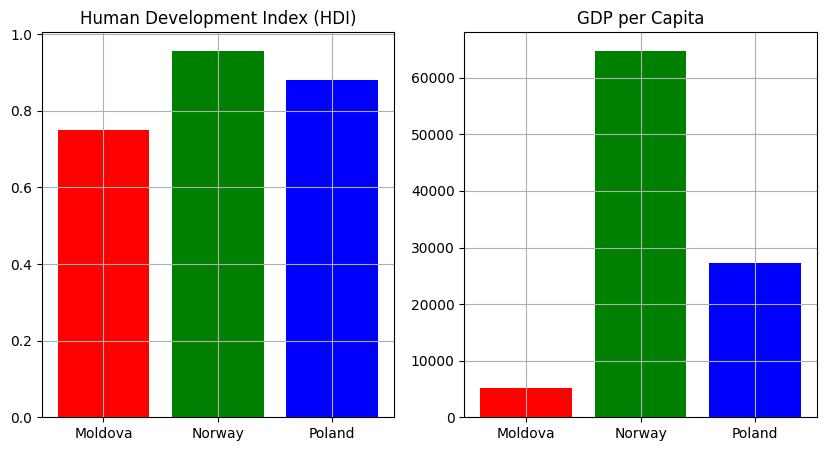

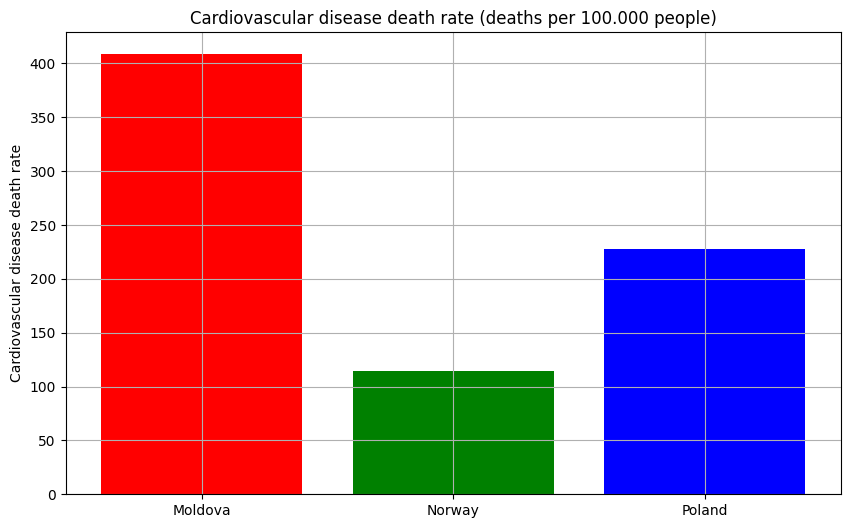

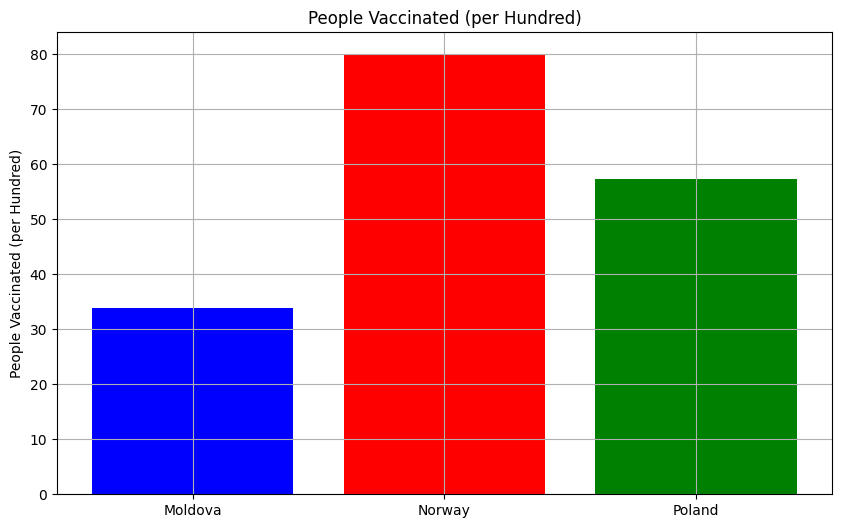

In [12]:
selected_countries = [highest_hdi_country, closest_hdi_country, lowest_hdi_country]
selected_df_main = europe_df[europe_df['location'].isin(selected_countries)]
selected_df = selected_df_main.drop_duplicates(subset = ['location'], keep = 'first')
colors = ['red','green','blue']

# Barplot for HDI and GDP per Capita
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].bar(selected_df['location'], selected_df['human_development_index'], color=colors)
axes[0].set_title('Human Development Index (HDI)')
axes[0].grid()

axes[1].bar(selected_df['location'], selected_df['gdp_per_capita'], color=colors)
axes[1].set_title('GDP per Capita')
axes[1].grid()
# plt.savefig('hdi_gdp.png', bbox_inches='tight')
plt.show()

# ------------------------------------------------------------------------------------------------------
# Barplot for cardiovascular disease deaths
fig = plt.figure(figsize=(10, 6))

plt.bar(selected_df['location'], selected_df['cardiovasc_death_rate'], color=colors)
plt.title('Cardiovascular disease death rate (deaths per 100.000 people)')
plt.ylabel('Cardiovascular disease death rate')
plt.grid()
# plt.savefig('cardiovascular_deathrate.png')
plt.show()

# ------------------------------------------------------------------------------------------------------
#Barplot for total vaccinations per hundred
# fig = plt.figure(figsize=(10, 6))

# plt.bar(selected_df_main['location'], selected_df_main['people_vaccinated_per_hundred'], color=colors)
# plt.title('People Vaccinated (per Hundred)')
# plt.ylabel('People Vaccinated (per Hundred)')
# plt.grid()
# plt.show()